# Time Series Analysis of Solar Data

### Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import data

In [2]:
df = pd.read_csv('../data/chart-data (25).csv', parse_dates=[0], index_col=0)

In [3]:
df.head()

,"Shark Meter, KWtotal Kilowatts","AE 500kW 1, AC Power Kilowatts","AE 500kW 2, AC Power Kilowatts",(Offline) Weather Station - POA (POA)* Watts/meter²,Weather Station (POA) (SO31456) (POA)* Watts/meter²,"RECx31 Weather Station, Module Temp Degrees Celsius","RECx31 Weather Station, Ambient Temp Degrees Celsius"
Site Time,,,,,,,
2020-01-01 00:00:00,0,0.0,0.0,16.963,NaN,4.990,6.045
2020-01-01 00:15:00,0,0.0,0.0,17.477,NaN,4.541,5.995
2020-01-01 00:30:00,0,0.0,0.0,17.296,NaN,4.293,5.839
2020-01-01 00:45:00,0,0.0,0.0,17.102,NaN,4.156,5.884
2020-01-01 01:00:00,0,0.0,0.0,16.946,NaN,3.867,5.828


In [4]:
df.shape

(35136, 7)

In [5]:
df.dtypes

Shark Meter, KWtotal Kilowatts                           object
AE 500kW 1, AC Power Kilowatts                          float64
AE 500kW 2, AC Power Kilowatts                          float64
(Offline) Weather Station - POA (POA)* Watts/meter²      object
Weather Station (POA) (SO31456) (POA)* Watts/meter²      object
RECx31 Weather Station, Module Temp Degrees Celsius     float64
RECx31 Weather Station, Ambient Temp Degrees Celsius    float64
dtype: object

We've got two columns which were read in as strings, probably because they have commas in them, so let's strip the commas.  

In [6]:
df.replace(',','', regex=True, inplace=True)
c = df.select_dtypes(object).columns
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [7]:
df.dtypes

Shark Meter, KWtotal Kilowatts                          float64
AE 500kW 1, AC Power Kilowatts                          float64
AE 500kW 2, AC Power Kilowatts                          float64
(Offline) Weather Station - POA (POA)* Watts/meter²     float64
Weather Station (POA) (SO31456) (POA)* Watts/meter²     float64
RECx31 Weather Station, Module Temp Degrees Celsius     float64
RECx31 Weather Station, Ambient Temp Degrees Celsius    float64
dtype: object

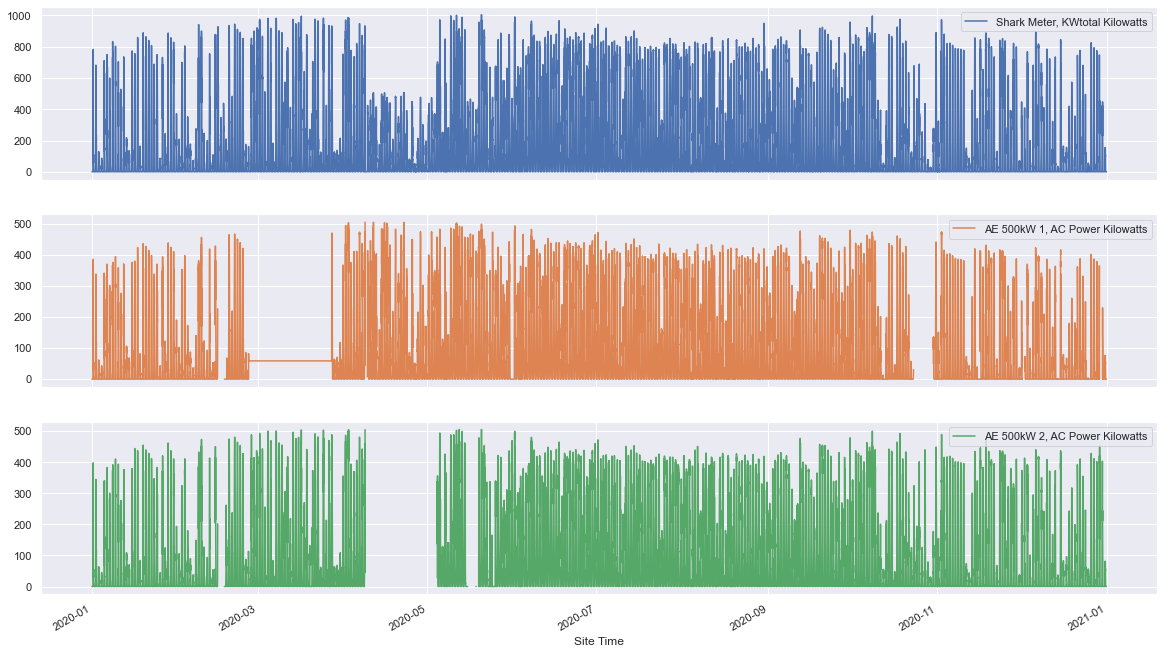

In [8]:
df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts','AE 500kW 2, AC Power Kilowatts']]\
        .plot(subplots=True, layout=(3,1), figsize=(20,12));

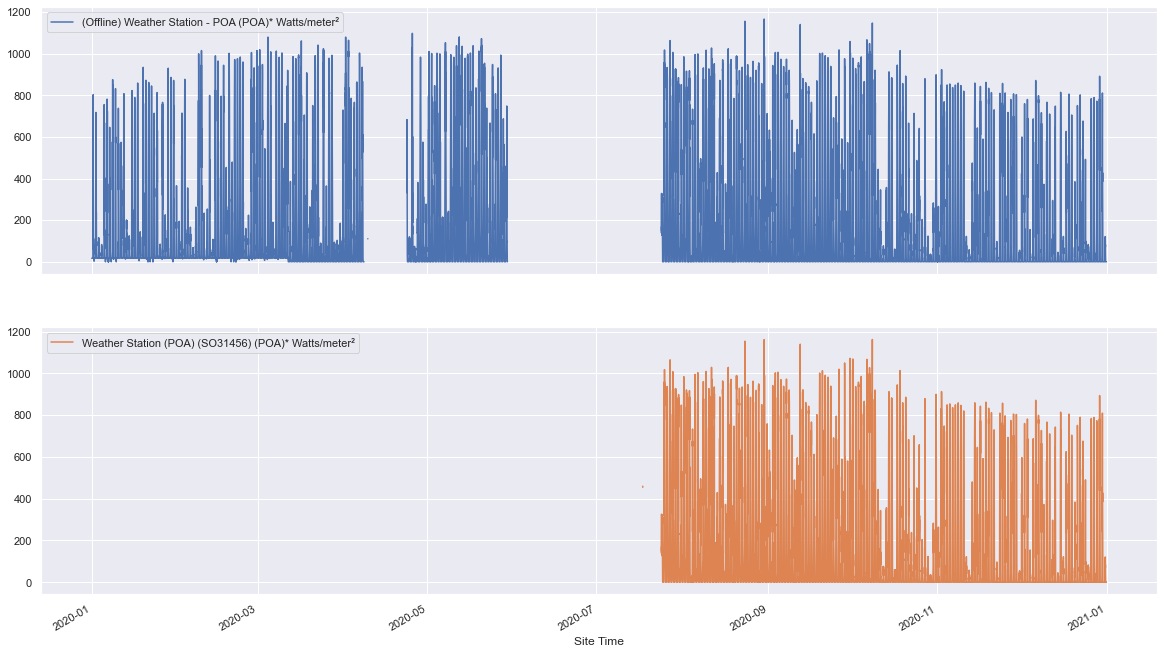

In [9]:
df[['(Offline) Weather Station - POA (POA)* Watts/meter²','Weather Station (POA) (SO31456) (POA)* Watts/meter²']]\
        .plot(subplots=True, layout=(2,1), figsize=(20,12));

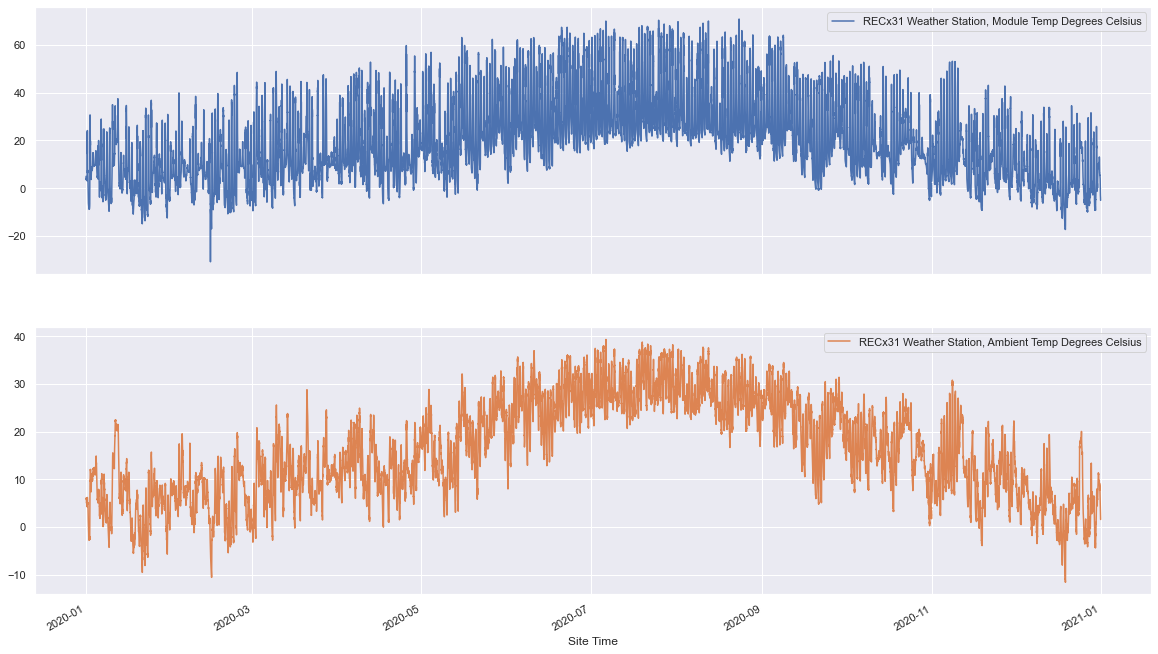

In [10]:
df[['RECx31 Weather Station, Module Temp Degrees Celsius','RECx31 Weather Station, Ambient Temp Degrees Celsius']]\
        .plot(subplots=True, layout=(2,1), figsize=(20,12));

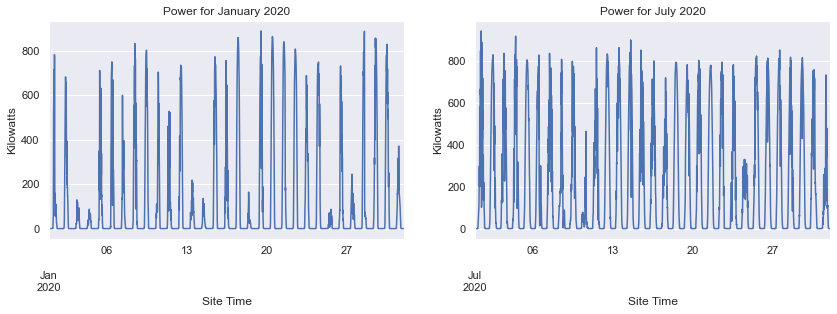

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
_ = plt.subplot(1,2,1)
df.loc['2020-01-01':'2020-01-31','Shark Meter, KWtotal Kilowatts'].plot()
_ = plt.title('Power for January 2020')
_ = plt.ylabel('Kilowatts')
_ = plt.subplot(1,2,2)
df.loc['2020-07-01':'2020-07-31','Shark Meter, KWtotal Kilowatts'].plot()
_ = plt.title('Power for July 2020')
_ = plt.ylabel('Kilowatts')

What we are seeing are power measurements, so we can see the seasonal variation in terms of the density of the July data as compared with the January data.  If we want to see the seasonality in terms of magnitude, we need to compute energy by integrating the time series data we have, or taking the 15-minute power measurements and summing them over the hour.  Let's look at just one week to see this more clearly.  

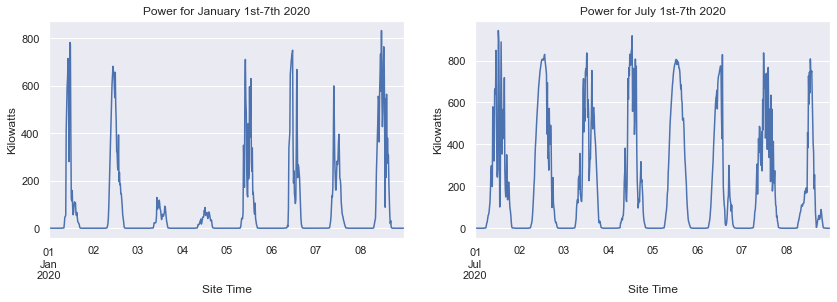

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4))
_ = plt.subplot(1,2,1)
df.loc['2020-01-01':'2020-01-08','Shark Meter, KWtotal Kilowatts'].plot()
_ = plt.title('Power for January 1st-7th 2020')
_ = plt.ylabel('Kilowatts')
_ = plt.subplot(1,2,2)
df.loc['2020-07-01':'2020-07-08','Shark Meter, KWtotal Kilowatts'].plot()
_ = plt.title('Power for July 1st-7th 2020')
_ = plt.ylabel('Kilowatts')

Now we can see clearly that in the summertime our maximum power values may not be higher, but the area under the curve certainly is.  So let's resample the data into kiloWattHours.  

I think we have duplicate entries in our timeseries index so we need to fix that.  

In [57]:
df.index.is_unique

False

A-ha!  That's the reason we are not able to infer the frequency of our index.  So let's groupby time, averaging the results.  

In [60]:
df = df.groupby(level=0).mean()

In [66]:
df = df.asfreq(freq='15T')

In [67]:
df.index

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 00:15:00',
               '2020-01-01 00:30:00', '2020-01-01 00:45:00',
               '2020-01-01 01:00:00', '2020-01-01 01:15:00',
               '2020-01-01 01:30:00', '2020-01-01 01:45:00',
               '2020-01-01 02:00:00', '2020-01-01 02:15:00',
               ...
               '2020-12-31 21:30:00', '2020-12-31 21:45:00',
               '2020-12-31 22:00:00', '2020-12-31 22:15:00',
               '2020-12-31 22:30:00', '2020-12-31 22:45:00',
               '2020-12-31 23:00:00', '2020-12-31 23:15:00',
               '2020-12-31 23:30:00', '2020-12-31 23:45:00'],
              dtype='datetime64[ns]', name='Site Time', length=35136, freq='15T')

### Calculate KWatt Hours

In [102]:
df_hourly = df[['Shark Meter, KWtotal Kilowatts','AE 500kW 1, AC Power Kilowatts', 'AE 500kW 2, AC Power Kilowatts']].resample('H').sum()*.25

In [106]:
df_hourly.columns = ['Shark Meter, KWH','AE 500kW 1, KWH','AE 500kW 2, KWH']

It's still hard to see the seasonal variation because the data is so noisy, so let's plot a rolling average of a day.  

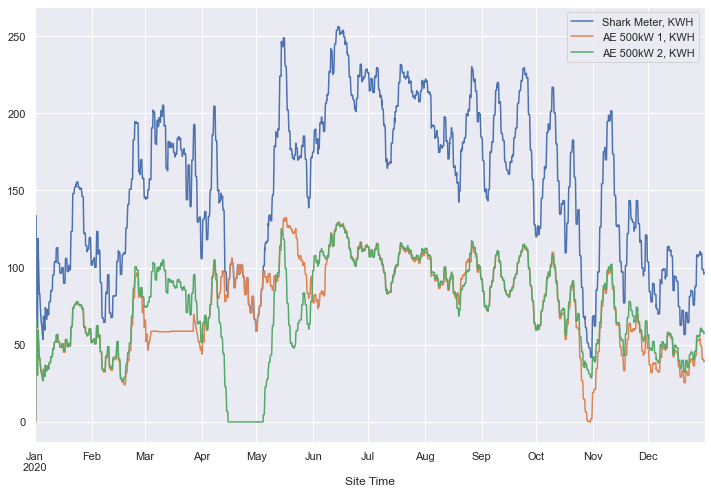

In [108]:
#df_hourly.rolling(window='1D').mean().plot(figsize=(12,8))
df_hourly.rolling(window='7D').mean().plot(figsize=(12,8));

Now we clearly see the seasonal varation in energy, and we see that the meter's output is the sum of the two inverters.  We can see where the second inverter had some sort of outage.  